## matplotlib

### plt.subplot
- Doc:  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

In [ ]:
# Examples, a clip from offitial document (the above link)

# subplot(nrows, ncols, index, **kwargs)

plt.subplot(221)

# equivalent but more general
ax1 = plt.subplot(2, 2, 1)

Note that the position of the subplot can be described by one of

- Three integers (nrows, ncols, index). The subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right. index can also be a two-tuple specifying the (first, last) indices (1-based, and including last) of the subplot, e.g., fig.add_subplot(3, 1, (1, 2)) makes a subplot that spans the upper 2/3 of the figure.

- A 3-digit integer. The digits are interpreted as if given separately as three single-digit integers, i.e. fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5). Note that this can only be used if there are no more than 9 subplots.

- ...

In [ ]:
def display_one_flower(image, title, subplot, red=False):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image)
    plt.title(title, fontsize=16, color='red' if red else 'black')
    return subplot+1 # way to switch to the next subplot
  
def display_9_images_from_dataset(dataset):
  subplot=331
  plt.figure(figsize=(13,13))
  images, labels = pass
  for i, image in enumerate(images):
    title = CLASSES[np.argmax(labels[i], axis=-1)] # CLASSES = [NAME OF LABELS]
    subplot = display_one_flower(image, title, subplot)
    if i >= 8:
      break;

### plt.subplots

- Doc:<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

In [ ]:
# Examples, a clip from offitial document (the above link)

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

### plt.rc()

is used tocustomize all kinds of properties, which we call 'rc settings' or 'rc parameters'.

- Doc:  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html

In [ ]:
# Example, a block in https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/ungradedLab/8uXQx/built-in-callbacks/lab

# Visualization utilities
plt.rc('font', size=20)
plt.rc('figure', figsize=(15, 3))

def display_digits(inputs, outputs, ground_truth, epoch, n=10):
    plt.clf() # Clear the current figure.
    plt.yticks([])
    plt.grid(None)
    inputs = np.reshape(inputs, [n, 28, 28])
    inputs = np.swapaxes(inputs, 0, 1)
    inputs = np.reshape(inputs, [28, 28*n])
    plt.imshow(inputs)
    plt.xticks([28*x+14 for x in range(n)], outputs)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if outputs[i] == ground_truth[i]: 
            t.set_color('green') 
        else: 
            t.set_color('red')
    plt.grid(None)

### plt.imshow()
plt.imshow() just finishes drawing a picture instead of printing it. If you want to print the picture, you just need to add plt.show()

### [fmt] 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

e.g. plot(x1, y1, 'bo'), plot(x2, y2, 'g')  


### Tick locators

https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html

In [ ]:
# Example
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

### Confusion Matrix

<ipython-input-19-af48f3acde30>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-19-af48f3acde30>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


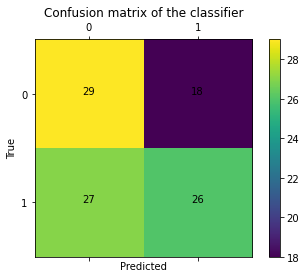

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

y_true = np.random.choice(2,100)
y_pred = np.random.choice(2,100)
plot_confusion_matrix( y_true,y_pred, title='Random test', labels = [0, 1])

## Utility to display a row of images with their predictions and true labels

In [ ]:
# utility to display a row of images with their predictions and true labels
def display_images(image, predictions, labels, title, n):

  display_strings = [str(i) + "\n\n" + str(j) for i, j in zip(predictions, labels)] 

  plt.figure(figsize=(17,3))
  plt.title(title)
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], display_strings)
  plt.grid(None)
  image = np.reshape(image, [n, 28, 28])
  image = np.swapaxes(image, 0, 1)
  image = np.reshape(image, [28, 28*n])
  plt.imshow(image)

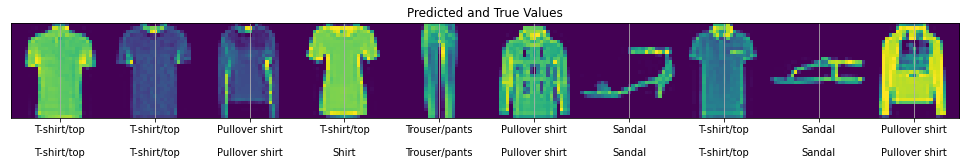

In [23]:
test_inputs = test_data.batch(batch_size=1000001)
x_batches, y_pred_batches, y_true_batches = [], [], []

for x, y in test_inputs:
  y_pred = model(x)
  y_pred_batches = y_pred.numpy()
  y_true_batches = y.numpy()
  x_batches = x.numpy()

indexes = np.random.choice(len(y_pred_batches), size=10)
images_to_plot = x_batches[indexes]
y_pred_to_plot = y_pred_batches[indexes]
y_true_to_plot = y_true_batches[indexes]

y_pred_labels = [class_names[np.argmax(sel_y_pred)] for sel_y_pred in y_pred_to_plot]
y_true_labels = [class_names[sel_y_true] for sel_y_true in y_true_to_plot]
display_images(images_to_plot, y_pred_labels, y_true_labels, "Predicted and True Values", 10)